Predicting taxi fare

1. Read the dataset into a dataframe. Parse the pickup_datetime so that it is read as a timestamp.

In [ ]:
import pandas as pd

data = pd.read_csv('taxifares.csv', parse_dates=['pickup_datetime'])

2. Explore the dataset and determine what is the target variable.

In [ ]:
print(data.head())
print(data.info())

# Target variable is 'fare_amount'

       key  fare_amount           pickup_datetime  pickup_longitude  \
0  08:00.0         17.5 2013-05-25 01:08:00+00:00         40.706932   
1  39:00.0         22.0 2013-05-22 13:39:00+00:00         40.719187   
2  01:00.0         11.0 2013-05-24 21:01:00+00:00         40.731230   
3  31:00.0         18.5 2013-05-26 19:31:00+00:00         40.740127   
4  57:00.0         10.0 2013-05-23 18:57:00+00:00         40.734352   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0       -74.008970          40.749357        -73.984160                1  
1       -74.008550          40.751062        -73.978658                2  
2       -74.006850          40.765810        -73.983740                1  
3       -74.005905          40.717935        -73.996982                1  
4       -74.002660          40.713530        -73.963830                1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55367 entries, 0 to 55366
Data columns (total 8 columns):
 #   Column    

Target variable is 'fare_amount'

3. Drop factor(s) that are not likely to be relevant for predicting the taxi fare.

In [ ]:
data = data.drop(columns=['key'])

4. Extract the weekday and the time (hours/minutes) from the pickup_datetime. Store in the data frame. Drop the pickup_datetime.

In [ ]:
data['weekday'] = data['pickup_datetime'].dt.weekday
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_minute'] = data['pickup_datetime'].dt.minute
data = data.drop(columns=['pickup_datetime'])

5. Compute the distance between pickup_longitude and dropoff_longitude by using this approximate formula for relatively close points in the earth (e.g. within NYC) (2) a = diff in longitude of two points * 54.6 b = diff in latitude of two points * 69.0 distance in miles = sqrt (a^2 + b^2)

In [ ]:
import numpy as np

def calculate_distance(row):
    a = (row['dropoff_longitude'] - row['pickup_longitude']) * 54.6
    b = (row['dropoff_latitude'] - row['pickup_latitude']) * 69.0
    return np.sqrt(a**2 + b**2)

data['distance'] = data.apply(calculate_distance, axis=1)

6. After computing the distance, you can drop latitude and longitude columns.

In [ ]:
data = data.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

7. Assign X (features variables) and y (target variable)

In [ ]:
X = data.drop('fare_amount', axis=1)
y = data['fare_amount']

8. Build a keras sequential model with at least two dense layers. Number of neurons is your choice (> 50). Activation function is your choice.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))

9. Add a dense output layer.

In [ ]:
model.add(Dense(1))

10. Compile the model with optimizer as adam, loss as mean squared error, metrics as mean squared error.

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

11. Train the model. Partition with a split of 70/30. Epochs > 30.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
history = model.fit(X_train, y_train, validation_split=0.3, epochs=35, batch_size=32)

Epoch 1/35
848/848 [==============================] - 8s 9ms/step - loss: 107.6132 - mean_squared_error: 107.6132 - val_loss: 31.1641 - val_mean_squared_error: 31.1641
Epoch 2/35
848/848 [==============================] - 7s 8ms/step - loss: 42.1916 - mean_squared_error: 42.1916 - val_loss: 32.2127 - val_mean_squared_error: 32.2127
Epoch 3/35
848/848 [==============================] - 9s 10ms/step - loss: 84.4451 - mean_squared_error: 84.4451 - val_loss: 37.0168 - val_mean_squared_error: 37.0168
Epoch 4/35
848/848 [==============================] - 6s 7ms/step - loss: 76.9464 - mean_squared_error: 76.9464 - val_loss: 30.7716 - val_mean_squared_error: 30.7716
Epoch 5/35
848/848 [==============================] - 5s 6ms/step - loss: 30.4792 - mean_squared_error: 30.4792 - val_loss: 29.9064 - val_mean_squared_error: 29.9064
Epoch 6/35
848/848 [==============================] - 7s 8ms/step - loss: 34.8192 - mean_squared_error: 34.8192 - val_loss: 46.6897 - val_mean_squared_error: 46.6897
E

12. Display the plot of the training and validation accuracy vs epoch.

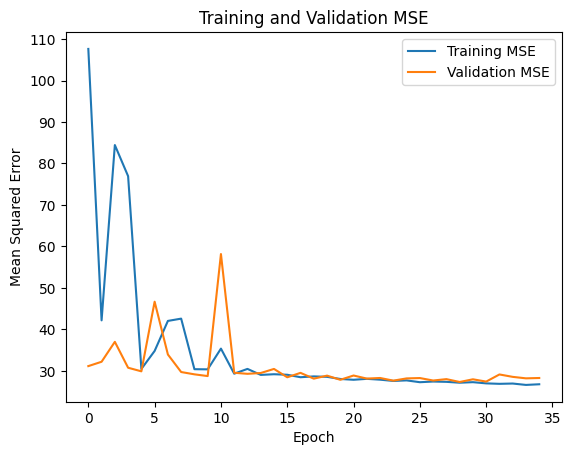

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Training and Validation MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Training MSE', 'Validation MSE'], loc='upper right')
plt.show()

13. Print the R-squared score.

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
print("R-squared Score:", r2_score(y_test, y_pred))

520/520 [==============================] - 2s 5ms/step
R-squared Score: 0.7094750038271036


14. Finally, print the prediction of taxi fare for 2 passengers riding 3.2 miles at 3:20 pm on a Friday.

In [ ]:
# Sample: 2 passengers, 3.2 miles, 3:20 pm, Friday
sample_data = pd.DataFrame({
    'passenger_count': [2],
    'weekday': [4],
    'pickup_hour': [15],
    'pickup_minute': [20],
    'distance': [3.2]
})

predicted_fare = model.predict(sample_data)
print(f"The fare for 2 passengers to ride 3.2 miles at 3:20 pm on a Friday is ${predicted_fare[0][0]:.6f}")

1/1 [==============================] - 0s 32ms/step
The fare for 2 passengers to ride 3.2 miles at 3:20 pm on a Friday is $13.959302
